In [105]:
import pandas as pd
import numpy as np
import os
from importlib import reload
import skimage.io
import matplotlib 
import matplotlib.pyplot as plt 

# local code
import sys
sys.path.append("../source/")

In [375]:
# DATA PATHS
czi_path = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/PIP_FUCCI_ANALYSIS/3x3_example/3x3-extract-Scene6-07-14to15_stitched.czi"
trackmate_path = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/PIP_FUCCI_ANALYSIS/3x3_example/spots.csv"
tiff_path = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/PIP_FUCCI_ANALYSIS/3x3_example/composite.tif"

# global vars
DATA_NAME = "wh17" # for figure/artifact naming

In [376]:
df = pd.read_csv(trackmate_path, skiprows=[1, 2, 3])

print(df.shape)
df.head()

(9160, 46)


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,ELLIPSE_X0,ELLIPSE_Y0,ELLIPSE_MAJOR,ELLIPSE_MINOR,ELLIPSE_THETA,ELLIPSE_ASPECTRATIO,AREA,PERIMETER,CIRCULARITY,SOLIDITY
0,ID2048,2048,0.0,0.878096,523.020829,153.680515,0.0,0.0,0,11.569420,...,-0.009108,-0.014822,9.968608,6.872604,-1.070683,1.450485,213.665830,54.341668,0.909241,0.985991
1,ID2049,2049,1.0,0.877759,751.858896,736.064453,0.0,0.0,0,9.915178,...,0.005490,-0.001367,8.915510,7.055279,-1.498613,1.263665,195.918723,51.408901,0.931556,0.985899
2,ID2050,2050,2.0,0.877330,1072.650317,215.045842,0.0,0.0,0,11.686807,...,0.018383,0.030800,10.290814,6.858087,0.910843,1.500537,219.970723,55.616483,0.893650,0.979210
3,ID2051,2051,3.0,0.876126,204.112742,624.639759,0.0,0.0,0,10.454277,...,0.036698,-0.008806,10.760367,5.866188,0.786917,1.834303,196.619267,54.584356,0.829277,0.971165
4,ID2052,2052,4.0,0.875895,1045.473422,625.509308,0.0,0.0,0,11.609676,...,-0.011611,0.103390,11.493837,6.306947,-0.961869,1.822409,225.341558,58.230534,0.835121,0.988730


In [377]:
# load the tiff into memory
tiff = skimage.io.imread(tiff_path)
tiff.shape

(49, 1329, 1801, 3)

In [378]:
df.columns

Index(['LABEL', 'ID', 'TRACK_ID', 'QUALITY', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'FRAME', 'RADIUS', 'VISIBILITY',
       'MANUAL_SPOT_COLOR', 'MEAN_INTENSITY_CH1', 'MEDIAN_INTENSITY_CH1',
       'MIN_INTENSITY_CH1', 'MAX_INTENSITY_CH1', 'TOTAL_INTENSITY_CH1',
       'STD_INTENSITY_CH1', 'MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2', 'MEAN_INTENSITY_CH3', 'MEDIAN_INTENSITY_CH3',
       'MIN_INTENSITY_CH3', 'MAX_INTENSITY_CH3', 'TOTAL_INTENSITY_CH3',
       'STD_INTENSITY_CH3', 'CONTRAST_CH1', 'SNR_CH1', 'CONTRAST_CH2',
       'SNR_CH2', 'CONTRAST_CH3', 'SNR_CH3', 'ELLIPSE_X0', 'ELLIPSE_Y0',
       'ELLIPSE_MAJOR', 'ELLIPSE_MINOR', 'ELLIPSE_THETA',
       'ELLIPSE_ASPECTRATIO', 'AREA', 'PERIMETER', 'CIRCULARITY', 'SOLIDITY'],
      dtype='object')

(139, 200, 3)


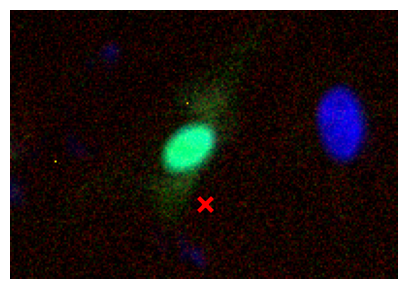

In [405]:
def get_images(tiff, frame, xpos, ypos, xwin=50, ywin=50):
    """A function to return a small frame of from a position
    at a specific time from a movie
    
    expects input shape (time, y, x, 3) for RGB image
    """
    f, m, n, c = tiff.shape
    
    xmin = int(xpos - xwin)
    xmax = int(xpos + xwin)
    ymin = int(ypos - ywin)
    ymax = int(ypos + ywin)
    
    # handle boundaries
    if xmin < 0:
        xmin = 0
        
    if xmax > n:
        xmax = n
        
    if ymin < 0:
        ymin = 0

    if ymax > m:
        ymax = m
    
    img = tiff[frame-1, ymin:ymax, xmin:xmax, :]
    return img

    
    
rand_row = df.sample(1)
xpos = rand_row['POSITION_X'].values[0]
ypos = rand_row['POSITION_Y'].values[0]
frame = rand_row['FRAME'].values[0]

# print(frame, xpos, ypos)

xwin = 100
ywin = 100
img = get_images(tiff, frame, xpos, ypos, xwin, ywin)

plt.rcParams['figure.dpi'] = 100
plt.imshow(img)
plt.axis(False)

print(img.shape)
plt.scatter(xwin, ywin, c='r', marker="x", s=100, lw=3)

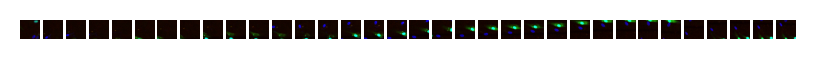

In [403]:
# df['max_step'] = df.groupby("TRACK_ID")['FRAME'].transform(np.max)

# df.head()

rand_track = np.random.choice(df['TRACK_ID'].unique(), 1)[0]


tmp = df[df['TRACK_ID'] == rand_track].reset_index()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 5
fig, axs = plt.subplots(1, len(tmp))


xwin = 100
ywin = 100

for idx, row in tmp.iterrows():
    xpos = row['POSITION_X']
    ypos = row['POSITION_Y']
    frame = row['FRAME']

    img = get_images(tiff, frame, xpos, ypos, xwin, ywin)
    
    axs[idx].imshow(img)
    axs[idx].axis('off')
    